<a href="https://colab.research.google.com/github/Precillieo/Tensorflow-Computer-Vision-/blob/main/Tensorflow_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import tensorflow as tf
import cProfile 

In [2]:
tf.executing_eagerly() #In Tensorflow 2.0, eager execution is enabled by default

True

In [3]:
x= [[2.]]
m= tf.matmul(x,x)
print ("Hello, {}".format(m)) #TensorFlow operations

Hello, [[4.]]


In [4]:
a= tf.constant([[1,2], [3,4]])
print(a)     #TensorFlow tf.math operations convert Python objects and NumPy arrays to tf.Tensor objects

tf.Tensor(
[[1 2]
 [3 4]], shape=(2, 2), dtype=int32)


In [5]:
b= tf.add(a,1)
print(b)     

tf.Tensor(
[[2 3]
 [4 5]], shape=(2, 2), dtype=int32)


In [6]:
c= tf.multiply(a, 2)
print(c) 

tf.Tensor(
[[2 4]
 [6 8]], shape=(2, 2), dtype=int32)


In [7]:
#operation overloading
print(a*b)

tf.Tensor(
[[ 2  6]
 [12 20]], shape=(2, 2), dtype=int32)


In [8]:
import numpy as np
c= np.multiply(a,b)
print(c)

[[ 2  6]
 [12 20]]


In [9]:
print(a.numpy())  #tf.Tensor.numpy method returns the object's value as a NumPy ndarray.

[[1 2]
 [3 4]]


# Dynamic Control 
## Writing Fizzbuzz in Tensorflow

In [10]:
def fizzbuzz(max_num):
  counter= tf.constant(0)
  max_num= tf.convert_to_tensor(max_num) 
  for num in range(1, max_num.numpy() + 1):
    num= tf.constant(num)
    if int (num % 3)==0 and int (num % 5) == 0:
      print('fizzbuzz')
    elif int (num % 3) == 0:
      print('fizz')
    elif int (num % 5)== 0:
      print ('buzz')
    else:
      print(num.numpy())
    counter += 1      

fizzbuzz(12)

1
2
fizz
4
buzz
fizz
7
8
fizz
buzz
11
fizz


# Eager Training__ Computing Gradients

In [11]:
w= tf.Variable([[1.]])
with tf.GradientTape() as tape:
  loss= w * w

grad= tape.gradient(loss, w)
print(grad)

# tf.GradientTape is to trace operations for computing gradients 

tf.Tensor([[2.]], shape=(1, 1), dtype=float32)


# Train a Model
This example creates a multi-layer model that classifies the standard MNIST handwritten digits. It demonstrates the optimizer and layer APIs to build trainable graphs in an eager execution environment

In [12]:
#fetch and format the mnist dataset
(mnist_images, mnist_labels), _= tf.keras.datasets.mnist.load_data()

df= tf.data.Dataset.from_tensor_slices(
    (tf.cast(mnist_images[...,tf.newaxis]/255, tf.float32),
     tf.cast(mnist_labels, tf.int32)))

df= df.shuffle(1000).batch(32)

11493376/11490434 [==============================] - 0s 0us/step


In [13]:
#Build the model
mnist_model= tf.keras.Sequential([tf.keras.layers.Conv2D(16,[3,3], activation= 'relu', 
                                                         input_shape= (None, None, 1)),
                                  tf.keras.layers.Conv2D(16,[3,3], activation= 'relu'),
                                  tf.keras.layers.GlobalAveragePooling2D(),
                                  tf.keras.layers.Dense(10),
                                  ])


In [14]:
#Even without training, call the model and inspect the output in eager execution

for images, labels in df.take(2):
  print("Logists", mnist_model(images[0:1]).numpy())

Logists [[-0.02096592 -0.02837003 -0.01462397  0.02220962  0.00420284  0.01059656
  -0.02710742 -0.02066312  0.05300326  0.03725768]]
Logists [[-0.01458901 -0.01615399 -0.0087649   0.0107384   0.00319695  0.00704011
  -0.01554692 -0.00714759  0.02848515  0.02399837]]


# Training Loop Implementation

In [15]:
optimizer= tf.keras.optimizers.Adam()
loss_object= tf.keras.losses.SparseCategoricalCrossentropy(from_logits= True)

loss_history= []

In [16]:
def train_step(images, labels):
  with tf.GradientTape() as tape:
    logits= mnist_model(images, training= True)

    # Add Assert to check the shape of the output
    # Use the assert function in tf.debugging to check if a condition holds up
    tf.debugging.assert_equal(logits.shape, (32, 10))

    loss_value= loss_object(labels, logits)
    loss_history.append(loss_value.numpy().mean())

    grads= tape.gradient(loss_value, mnist_model.trainable_variables)
    optimizer.apply_gradients(zip(grads, mnist_model.trainable_variables))

In [17]:
def train(epochs):
  for epoch in range(epochs):
    for (batch, (image, labels)) in enumerate(df):
      train_step(images, labels)
    print ("Epoch {} finished".format(epoch))

In [18]:
train(epochs=3)

Epoch 0 finished
Epoch 1 finished
Epoch 2 finished


Text(0, 0.5, 'Loss[entropy')

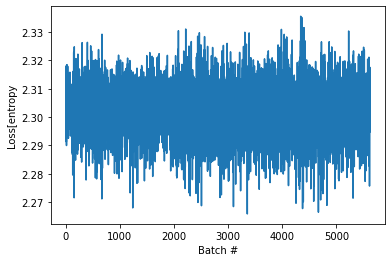

In [19]:
import matplotlib.pyplot as plt
plt.plot(loss_history)
plt.xlabel('Batch #')
plt.ylabel('Loss[entropy')

# Variable and Optimizer as Objects. 
The collections of variables can be encapsulated into layers or models, along with methods that operate on them.

The main difference between layers and models is that models add methods like Model.fit, Model.evaluate, and Model.save.

In [20]:
class Linear(tf.keras.Model):
  def __init__(self):
    super(Linear, self).__init__()
    self.W= tf.Variable(5., name= "weights")
    self.B= tf.Variable(10., name= "Bias")
  def call (self, inputs):
    return inputs * self.W + self.B 


In [21]:
# A toy dataset of points around 3 * x + 2
NUM_EXAMPLES= 2000
training_inputs= tf.random.normal([NUM_EXAMPLES])
noise= tf.random.normal([NUM_EXAMPLES])
training_outputs= training_inputs * 3 + 2 + noise

#The loss function to be optimized
def loss(model, inputs, targets):
  error= model(inputs) - targets
  return tf.reduce_mean(tf.square(error))

def grad(model, inputs, targets):
  with tf.GradientTape() as tape:
    loss_value= loss(model, inputs, targets) 
    return tape.gradient(loss_value, [model.W, model.B]) 


# Next:

* Create the model.
* The Derivatives of a loss function with respect to model parameters.
* A strategy for updating the variables based on the derivatives.

In [22]:
model= Linear()
optimizer= tf.keras.optimizers.SGD(learning_rate= 0.01)
print("Initial loss: {:.3f}".format(loss(model, training_inputs, training_outputs)))

steps= 300
for i in range(steps):
  grads= grad(model, training_inputs, training_outputs)
  optimizer.apply_gradients(zip(grads, [model.W, model.B]))

  if i % 20 == 0:
    print("Loss at step {:03d}: {:.3f}".format(i, loss(model, training_inputs, training_outputs)))

Initial loss: 68.454
Loss at step 000: 65.808
Loss at step 020: 30.103
Loss at step 040: 14.063
Loss at step 060: 6.856
Loss at step 080: 3.618
Loss at step 100: 2.163
Loss at step 120: 1.509
Loss at step 140: 1.216
Loss at step 160: 1.083
Loss at step 180: 1.024
Loss at step 200: 0.997
Loss at step 220: 0.985
Loss at step 240: 0.980
Loss at step 260: 0.978
Loss at step 280: 0.977


In [23]:
print("Final loss: {:.3f}".format(loss(model, training_inputs, training_outputs)))

Final loss: 0.976


In [24]:
print("W = {}, B = {}".format(model.W.numpy(), model.B.numpy()))

W = 2.966322660446167, B = 2.0202383995056152


# Object Based Saving
A tf.keras.Model includes a convenient save_weights method allowing you to easily create a checkpoint

In [25]:
model.save_weights('weights')
status= model.load_weights('weights')
status

In [26]:
x=tf.Variable(10.)
checkpoint = tf.train.Checkpoint(x=x)
checkpoint

In [27]:
x.assign(2.)
checkpoint_path= './ckpt/'
checkpoint.save('./ckpt/')

'./ckpt/-1'

In [28]:
x.assign(11.)  # Change the variable after saving.

# Restore values from the checkpoint
checkpoint.restore(tf.train.latest_checkpoint(checkpoint_path))

print(x)

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=2.0>


# tf.train.checkpoint
 for recording the state of a model, an optimizer, and global steps

In [29]:
model = tf.keras.Sequential([
  tf.keras.layers.Conv2D(16,[3,3], activation='relu'),
  tf.keras.layers.GlobalAveragePooling2D(),
  tf.keras.layers.Dense(10)
])

optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
checkpoint_dir = 'path/to/model_dir'
if not os.path.exists(checkpoint_dir):
  os.makedirs(checkpoint_dir)
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")
root = tf.train.Checkpoint(optimizer=optimizer,
                           model=model)

root.save(checkpoint_prefix)
root.restore(tf.train.latest_checkpoint(checkpoint_dir))

# Object-Oriented Metrics

In [30]:
m = tf.keras.metrics.Mean("loss")
m(0)
m(5)
print(m.result())  # => 2.5
m([8, 9])
print(m.result())

tf.Tensor(2.5, shape=(), dtype=float32)
tf.Tensor(5.5, shape=(), dtype=float32)


# Summaries and Tensorboard
TensorBoard is a visualization tool for understanding, debugging and optimizing the model training process. It uses summary events that are written while executing the program.

You can use tf.summary to record summaries of variable in eager execution. For example, to record summaries of loss once every 100 training steps 

In [31]:
logdir = "./tb/"
writer = tf.summary.create_file_writer(logdir)

steps = 1000
with writer.as_default():  # or call writer.set_as_default() before the loop.
  for i in range(steps):
    step = i + 1
    # Calculate loss with your real train function.
    loss = 1 - 0.001 * step
    if step % 100 == 0:
      tf.summary.scalar('loss', loss, step=step)

In [32]:
ls tb/

events.out.tfevents.1606766446.2f48cdf3556c.136.619696.v2
